<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
<img src="../support_files/images/cropped-SummerWorkshop_Header.png">  
<center><h1>Custom Modules and Version Control</h1></center>

<p>We have seen that new functionality in Python can be encapsulated as a <i>module</i>, and that we can import modules into our own code. In this section we will create a new Python module and package. This has a few important benefits: 

- Encapsulating functions inside a module makes them <i>importable</i> from many locations. That means we can use the came code from multiple locations without copy/paste.

- Encapsulation encourages us to make our code <i>reusable</i>. This mechanism allows us to develop tools that can be reused and shared in other projects.

- We would also like to be able to <i>collaborate</i> on these tools. Encapsulation makes it easier for other people to download, modify, and share changes to our code.

</div>

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
Let's begin by making a simple module. For now, it will contain just one function we can use to downsample time-series data.
</div>

In [1]:
# here is the code we'd like to include in the module:

import numpy as np

def downsample(data, n, axis=0):
    """Reduce the number of samples in an array by averaging together
    n samples at a time.
    """
    if n <= 1:
        return data
    new_len = data.shape[axis] // n
    s = list(data.shape)
    s[axis] = new_len
    s.insert(axis+1, n)
    sl = [slice(None)] * data.ndim
    sl[axis] = slice(0, new_len*n)
    d1 = data[tuple(sl)]
    d1.shape = tuple(s)
    d2 = d1.mean(axis+1)
    return d2

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
Just so we understand what this function does, let's generate a noisy time-series signal and plot it:
</div>

(-20.0, 20.0)

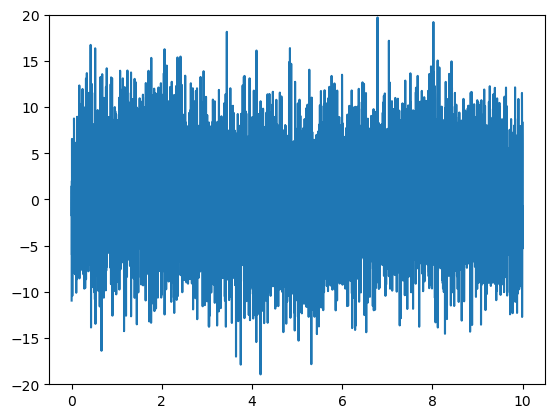

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(0, 10, 10000)
data = np.sin(t) + 5 * np.random.normal(size=len(t))
plt.plot(t, data)
plt.ylim(-20, 20)

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
And this is what the same signal looks like after it has been downsampled. Note that the downsampled signal has many fewer samples, and the overall noise is much smaller.
</div>

(-20.0, 20.0)

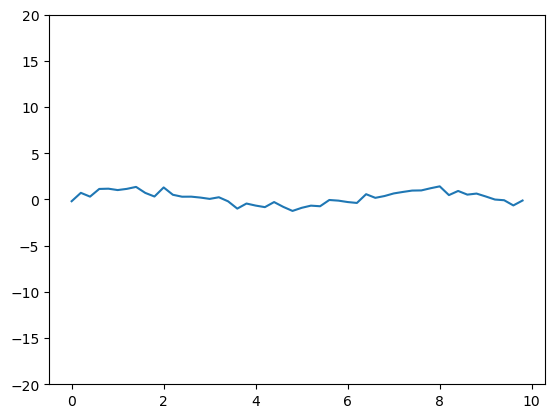

In [3]:
ds_data = downsample(data, 200)
plt.plot(t[::200], ds_data)
plt.ylim(-20, 20)

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
Just to reiterate: We have created a useful function, and now we would like to encapsulate it into a module so that

<ul>
<li>We can re-use this function in many different places without copying it, and
<li>We can share this function with other people.
</ul>

<br>
<hr>

Here's how to turn this code into a module:
<ol>
<li>Open a code editor and paste in the definition of `downsample()` given above, including the `import numpy` statement.
<li>Save the file as `my_module.py` in the same location as this notebook.
</ol>
<br>
You're done!<br>

Now let's see if it works:

</div>

In [4]:
# Remove the old downsample (so you can't cheat!)
if 'downsample' in locals():
    del downsample

# Import the new definition of `downsample` from your module
from my_module import downsample

# If you get "ImportError: No module named my_module", then make sure
# the .py file was saved in the same folder as this notebook file.

(-20.0, 20.0)

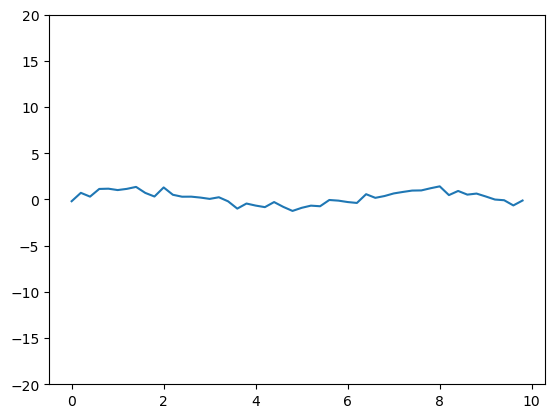

In [5]:
# test again:
ds_data = downsample(data, 200)
plt.plot(t[::200], ds_data)
plt.ylim(-20, 20)

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
Good so far, but there are some issues with this approach:

<ul>
<li>As our code becomes more complex, we will often want to organize it into multiple files and make them all appear as a single importable module.
<li>If we distribute this code, we will at least want to include a README to explain what it's about, so I'd really like my module to live inside its own folder.
</ul>

<hr>
So now we are going to turn this module into a <i>package</i>, which is really just a collection of modules inside a folder, along with some Python glue.
<ol>
<li>Make a new folder, in the same location as this notebook, called `my_package`
<li>Move `my_module.py` into this new folder
<li>Create an empty text file called `__init__.py` inside `my_package`. (note the double underscores)
</ol>
<br>
The `__init__.py` file is a hint to Python that tells it "this folder is a package that can be imported".

<hr>
Now let's try importing from the new package:

</div>

In [6]:
# Remove the old downsample (so you can't cheat!)
if 'downsample' in locals():
    del downsample

# Import downsample from our shiny new package
from my_package.my_module import downsample

(-20.0, 20.0)

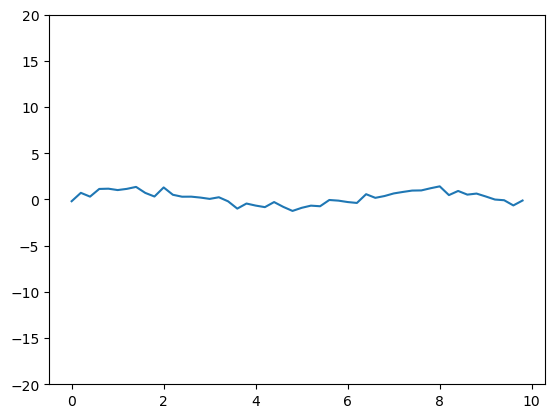

In [7]:
# test again:
ds_data = downsample(data, 200)
plt.plot(t[::200], ds_data)
plt.ylim(-20, 20)

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
Now that we have a package and are able to import from it, let's re-name our module to be a little more informative and  build out our package!
<ul>
<li>Rename `my_module.py` to `preprocessing.py`
<li>Discuss the following methods -- which one should be in our current existing module (preprocessing.py), and which one should go in a new module? 
</ul>
</div>

In [8]:
# here are the methods we'd like to include in the package

# which one should we put in data_processing.py, and which belongs in its own module?
import numpy as np

def normalize(data, axis=0):
    """Normalize an array along a given axis to have a mean of 0 and standard deviation of 1."""
    mean = np.mean(data, axis=axis, keepdims=True)
    std = np.std(data, axis=axis, keepdims=True)
    normalized_data = (data - mean) / std
    return normalized_data


def detect_peaks(data, threshold, distance=1):
    """Detect peaks in a 1D array based on a threshold and minimum distance 
    between peaks.
    
    Parameters:
    data : array-like
        1D array of data to search for peaks.
    threshold : float
        Minimum value for a peak to be considered.
    distance : int, optional
        Minimum number of samples between consecutive peaks (default is 1).
    
    Returns:
    array-like
        Indices of the detected peaks.
    """
    peaks = np.where((data[1:-1] > data[:-2]) & (data[1:-1] > data[2:]) & (data[1:-1] > threshold))[0] + 1
    if distance > 1:
        filtered_peaks = []
        last_peak = -distance
        for peak in peaks:
            if peak - last_peak >= distance:
                filtered_peaks.append(peak)
                last_peak = peak
        peaks = np.array(filtered_peaks)
    
    return peaks

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
Hopefully we all came to the conclusion that `normalize` can be packaged with `downsample`, while `detect_peaks` belongs in its own module. 
<ul>
<li>Similar Purpose: downsample and normalize are both data preparation methods, often used sequentially to transform raw data, so they naturally belong together in the same module.

<li>Different Functionality: detect_peaks serves a distinct purpose—identifying specific features (peaks) in data, which is more specialized and separate from general data transformation tasks.

<li>Separation of Concerns: Grouping downsample and normalize together enhances cohesion, while placing detect_peaks in a separate module maintains modularity, making your package easier to navigate and use.
</ul>

Let's name the new module `peak_detection.py`. 
</div>

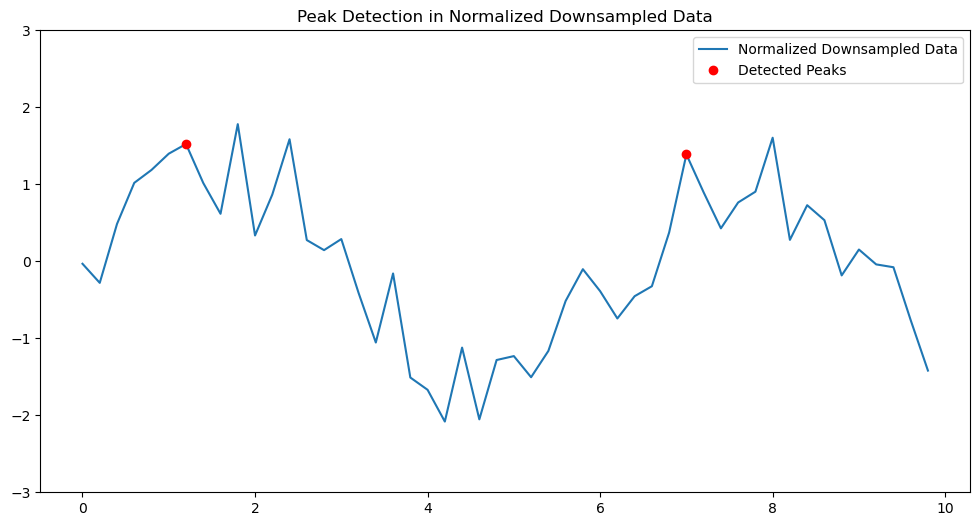

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from my_package.preprocessing import downsample, normalize
from my_package.peak_detection import detect_peaks

# Generating the time vector and data
t = np.linspace(0, 10, 10000)
data = np.sin(t) + 5 * np.random.normal(size=len(t))

# Downsample and normalize the data
ds_data = downsample(data, 200)
norm_data = normalize(ds_data)

# Detect peaks in the normalized data
peaks = detect_peaks(norm_data, threshold=0.5, distance=10)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t[::200], norm_data, label='Normalized Downsampled Data')
plt.plot(t[::200][peaks], norm_data[peaks], 'ro', label='Detected Peaks')
plt.ylim(-3, 3)
plt.title('Peak Detection in Normalized Downsampled Data')
plt.legend()
plt.show()

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
<h3>A note about namespaces</h3>

<p>Each python <i>file</i> that you work with has its own isolated namespace. That means we could write `x=1` inside the module, and `x=2` inside this notebook, and the two names will <i>not</i> collide; each `x` variable lives in a different namespace. `import` statements are how we create a reference from one module's namespace into another.

</div>

In [10]:
import my_package.my_module

# my_package contains a namespace with the variables "preprocessing" and "peak_detection"
dir(my_package)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'my_module',
 'peak_detection',
 'preprocessing']

In [11]:
# my_module contains its own namespace where the "downsample" function is defined and numpy has been imported
dir(my_package.preprocessing)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'downsample',
 'normalize',
 'np']

In [12]:
# The notebook we are working in contains its own namespace, which includes the name "my_package",
# amongst others.
dir()

['In',
 'Out',
 '_',
 '_10',
 '_11',
 '_2',
 '_3',
 '_5',
 '_7',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'data',
 'detect_peaks',
 'downsample',
 'ds_data',
 'exit',
 'get_ipython',
 'my_package',
 'norm_data',
 'normalize',
 'np',
 'open',
 'peaks',
 'plt',
 'quit',
 't']